### Corpus sur les hashtag Chanel, SpringSummer

In [16]:
import pandas as pd
chanel_5k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/chanel_5k.csv",sep=";", error_bad_lines=False)
chanel = chanel_5k[chanel_5k['language'] == 'en']['text'].tolist()
publication_time_chanel = chanel_5k[chanel_5k['language'] == 'en']['publication_time'].tolist()
len(chanel)

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_39848\3904026442.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chanel_5k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/chanel_5k.csv",sep=";", error_bad_lines=False)


2285

In [2]:
SS_5k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/SpringSummer_5k.csv",sep=";", error_bad_lines=False)
SS = SS_5k[SS_5k['language'] == 'en']['text'].tolist()

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_39848\4011020790.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  SS_5k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/SpringSummer_5k.csv",sep=";", error_bad_lines=False)


In [3]:
import numpy as np
import spacy

nlp = spacy.load("en_core_web_sm")

from spacymoji import Emoji


nlp.add_pipe("emoji", first=True)

In [4]:
import spacy 
from spacy.vocab import Vocab
from spacy.language import Language
from spacy.tokens import Token


@Language.component("hashtag")
def hashtag_pipe(doc):
    merged_hashtag = False
    while True:
        for token in doc:
            if token.text == '#':
                if token.head is not None:
                    start_index = token.i
                    end_index = start_index + 1
                    with doc.retokenize() as retokenizer:
                        retokenizer.merge(doc[start_index:end_index+1])
                        merged_hashtag = True
                        break
        if not merged_hashtag:
            break
        merged_hashtag = False
    return doc


In [5]:
nlp.add_pipe("hashtag", first=True)
hashtag_getter = lambda token: token.text[0] in ("#")
Token.set_extension("is_hashtag", getter=hashtag_getter, force=True)

In [6]:
def top_hashtags(text, N, top):
    hashtag = []
    index_vector = np.random.randint(len(text), size=N)
    for i in index_vector:
        doc = nlp(text[i])
        for token in doc:
            if token._.is_hashtag:
                hashtag.append(token.text)
    Hashtag_corpus = pd.DataFrame()
    Hashtag_corpus['hashtag'] = hashtag
    Hashtag_corpus2 = Hashtag_corpus.groupby("hashtag").size()
    print(Hashtag_corpus2.nlargest(top).tail(top))

Top 20 des # dans les corpus

Extraction du top 20 des # dans une selection aléatoire de N post du corpus

In [11]:
top_hashtags(chanel, 100, 20)

hashtag
#chanel              25
#fashion             10
#gucci                9
#instagood            9
#luxury               7
#style                6
#bag                  5
#luxurylifestyle      5
#shoes                5
#chanellover          4
#dior                 4
#lv                   4
#ootd                 4
#pink                 4
#Balenciaga           3
#Belt                 3
#Chanel               3
#Men'sshoes           3
#YvesSaintLaurent     3
#aesthetic            3
dtype: int64


In [17]:
top_hashtags(SS, 25, 20)

hashtag
#springsummer              12
#SpringSummer               8
#Firstcry                   6
#FirstcryIndia              6
#Firstcryfashion            6
#Firstcryshopping           6
#FussNowAtFirstcry          6
#kidsfashion                6
#kidswear                   6
#shopatFirstcry             6
#FirstcrySpringSummer23     5
#incollaboration            5
#newcollection              4
#springfashion              4
#springlaunch               4
#fashion                    3
#springiscoming             3
#springsummercollection     3
#2023                       2
#eveningdress               2
dtype: int64


In [7]:
def top_emojis(text, N, top):
    emoji = []
    index_vector = np.random.randint(len(text), size=N)
    for i in index_vector:
        doc = nlp(text[i])
        for token in doc:
            if token._.is_emoji:
                emoji.append(token.text)
    Emoji_corpus = pd.DataFrame()
    Emoji_corpus['emoji'] = emoji
    Emoji_corpus2 = Emoji_corpus.groupby("emoji").size()
    print(Emoji_corpus2.nlargest(top).tail(top))

Top 20 des emoji dans les corpus, même procédé que précedemment

In [37]:
top_emojis(chanel, 20, 20)

emoji
✈       3
🎁       3
📞       3
👓       2
👜       2
👞       2
👠       2
👶🏻      2
☀️      1
🇮🇹      1
💋       1
💖       1
💙       1
💚       1
💭       1
📷       1
😆       1
😍       1
😝       1
🙋🏼‍♀    1
dtype: int64


Création d'un corpous de 300 post permettant de caractériser un junk post

In [33]:
import re

def clean_hashtag(t): #--text
    hashtag_pattern= re.compile("#[A-Za-z0-9_]+")
    return re.sub(hashtag_pattern,"", t) #On supprime tout les types de #


def del_double(txt,publication_time,s,method): # --text --liste des date et heure de publication pour chaque élément de la liste --seuil (s dans [0;1] ou [0;100] selon la méthode) --méthode
    t = txt.copy()
    distance = method #initialisiation de levenshtein avec la distance normalisée.
    i = 0
    r = len(t)
    while(i<r):
        r = len(t)
        j=i+1
        while(j<r):
            if(distance(clean_hashtag(t[i]).strip(),clean_hashtag(t[j]).strip()) <= s ): # Si la distance entre les deux élemens de la liste inf à seuil
                if(publication_time[i]<publication_time[j]):
                    del t[j] #delete
                    r = len(t) #on actualise la taille de la listes
                else:
                    del t[i]
                    r = len(t) #on actualise la taille de la listes
            else:
                j+=1
        i+=1
    return t

In [34]:
import textdistance
dist = textdistance.levenshtein.normalized_distance

In [35]:
import random
chanel_junk_valid = random.choices(chanel, k=300)

In [38]:
chanel_junk_valid_dd = del_double(chanel_junk_valid,publication_time_chanel,0.5,dist)

In [39]:
len(chanel_junk_valid_dd)

122

In [40]:
chanel_junk_valid_df= pd.DataFrame()
chanel_junk_valid_df['text'] = chanel_junk_valid_dd

In [41]:
chanel_junk_valid_df.to_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/chanel_junk_valid.csv")
# Ajout de la variable is_junksur excel

In [45]:
chanel_junk_valid_new = pd.read_excel("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/chanel_junk_valid_new.xlsx", index_col=0)

In [52]:
def word_ratio(df):
    ratio = []
    for i in df['text']:
        doc = nlp(i)
        nb_word = 0
        nb_hash = 0
        for token in doc:
            if(token._.is_hashtag):
                nb_hash+=1
            else:
                nb_word+=1
        ratio.append(nb_word/(nb_hash+nb_word))
    df['ratio_word'] = ratio
    return df

In [53]:
word_ratio(chanel_junk_valid_new)

,text,is_junk,ratio_word
0,Smiley piercings😍😍\n\n(My post)\n\n(Follow coc...,1,0.375000
1,"If you are interested in my products, please a...",1,1.000000
2,#ZZ20230321074 #Chanel #白色图案刺绣圆领T恤 #SML #suit ...,1,0.000000
3,We have been engaged in the wholesale and reta...,1,1.000000
4,"NMACC opens in Mumbai this week, Beyoncé meets...",1,0.794118
...,...,...,...
117,"Hello dear, we are a professional product whol...",1,1.000000
118,We are mainly engaged in various brands of sho...,1,1.000000
119,tontawan so expensive rich girl 😍❤‍🔥\n\nFollow...,1,0.800000
120,#香奈儿#爱马仕#lv #迪奥#古驰#birkin #gucci #hongkong #he...,1,0.000000


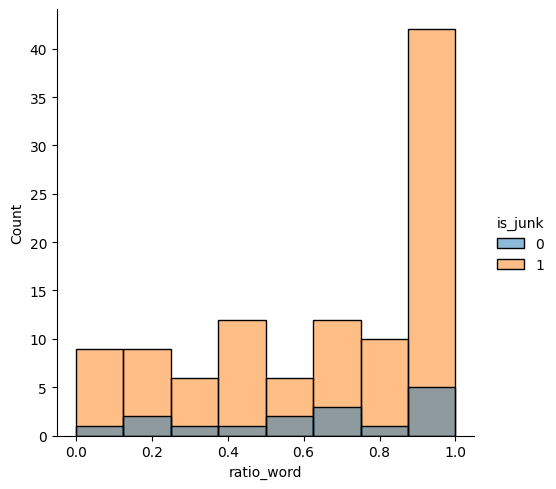

In [57]:
import seaborn as sns
sns.displot(chanel_junk_valid_new,
            x="ratio_word",
            hue="is_junk")

In [77]:
# Top des hashtags des junk post
top_hashtags(chanel_junk_valid_new[chanel_junk_valid_new['is_junk'] == 1]['text'].values.tolist(),106, 10)

hashtag
#chanel       50
#fashion      18
#Chanel       15
#style        14
#ootd         13
#dior         11
#gucci        10
#instagood    10
#model         9
#beauty        8
dtype: int64


In [79]:
# Top des hashtags des non junk post
top_hashtags(chanel_junk_valid_new[chanel_junk_valid_new['is_junk'] == 0]['text'].values.tolist(),16,20)

hashtag
#chanel                   12
#chanellover               5
#chanellove                4
#louisvuitton              4
#ysl                       4
#beautyobsessed            3
#chanelclassic             3
#dior                      3
#fashion                   3
#fendi                     3
#ootd                      3
#saintlaurent              3
#style                     3
#versace                   3
#artbeauty                 2
#bagaddict                 2
#baglover                  2
#beauties                  2
#beautifuldestinations     2
#beautyritual              2
dtype: int64


In [80]:
# Top des hashtags des junk post
top_emojis(chanel_junk_valid_new[chanel_junk_valid_new['is_junk'] == 1]['text'].values.tolist(),106, 10)

emoji
👉     17
✅     10
😍     10
✔      9
✨      8
✈      6
🇺🇸     6
🎁      6
📞      6
🔘      6
dtype: int64


In [81]:
# Top des hashtags des non junk post
top_emojis(chanel_junk_valid_new[chanel_junk_valid_new['is_junk'] == 0]['text'].values.tolist(),16,20)

emoji
💕     6
🥰     5
✨     2
☀️    1
🌷     1
🌸     1
🍨     1
🎀     1
🐣     1
💎     1
💙     1
📸     1
🥊     1
🧼     1
dtype: int64
